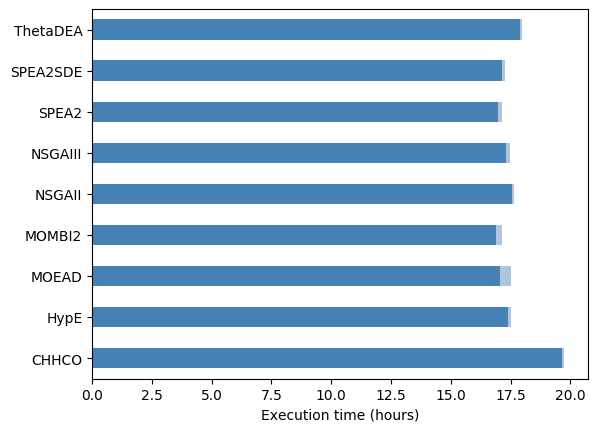

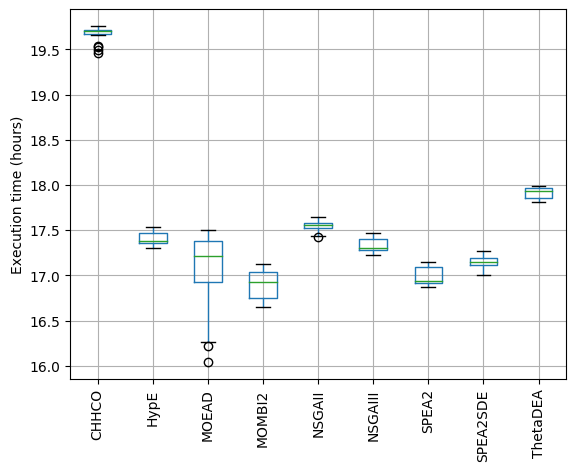

In [9]:
import pandas as pd

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('default')

algorithms=["CHHCO", "HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA"]
# algorithms=["ThetaDEA", "NSGAII"]

dflist = []
for alg in algorithms:
    base='../experiment/pc5/ECSymposium2019CompetitionMethodology/5/data/%s/WindTurbineDesign/TIME'%(alg)
    alglist = []
    for i in range(21):
        df = pd.read_csv("%s%s.tsv"%(base, i), header=None)
        df.columns = [alg]
        df[alg] = df[alg] / 3.6e+6 # milliseconds to hours
        alglist.append(df)
    dfalg = pd.concat(alglist)
    dfalg.reset_index(drop=True, inplace=True)
    dflist.append(dfalg)
df = pd.concat(dflist, axis=1)
ax = df.max().plot.barh(rot=0, color="lightsteelblue")
ax = df.mean().plot.barh(rot=0, ax=ax, color="steelblue")
ax.set_xlabel("Execution time (hours)")
plt.show()

ax = df.boxplot(rot=90)
ax.set_ylabel("Execution time (hours)")
plt.show()